# <center>ML ZOOMCAMP MIDTERM PROJECT<center>
# <center>  "WEIGHT CLASS PREDICTION" <center>

### PROBLEM STATEMENT:

**To predict the weight class of an individual based on their age, height, eating habits, and other social factors using multiclass classification algorithms.** 

In [498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [499]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support

In [500]:
df = pd.read_csv('Obesity_Dataset.csv')
df

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2,51,165,2,1,1,3,4,1,3,1,3,1,1,4
1606,2,51,163,2,1,2,2,4,2,2,2,5,1,1,4
1607,2,52,162,1,2,1,3,4,1,3,1,4,1,1,4
1608,2,53,168,2,1,1,3,4,1,2,2,2,1,1,4


In [501]:
df.columns = df.columns.str.lower()
df

,sex,age,height,overweight_obese_family,consumption_of_fast_food,frequency_of_consuming_vegetables,number_of_main_meals_daily,food_intake_between_meals,smoking,liquid_intake_daily,calculation_of_calorie_intake,physical_excercise,schedule_dedicated_to_technology,type_of_transportation_used,class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2,51,165,2,1,1,3,4,1,3,1,3,1,1,4
1606,2,51,163,2,1,2,2,4,2,2,2,5,1,1,4
1607,2,52,162,1,2,1,3,4,1,3,1,4,1,1,4
1608,2,53,168,2,1,1,3,4,1,2,2,2,1,1,4


In [502]:
df = df.rename(columns = {'class' : 'weight_class', 'physical_excercise' : 'physical_exercise'})
df

,sex,age,height,overweight_obese_family,consumption_of_fast_food,frequency_of_consuming_vegetables,number_of_main_meals_daily,food_intake_between_meals,smoking,liquid_intake_daily,calculation_of_calorie_intake,physical_exercise,schedule_dedicated_to_technology,type_of_transportation_used,weight_class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2,51,165,2,1,1,3,4,1,3,1,3,1,1,4
1606,2,51,163,2,1,2,2,4,2,2,2,5,1,1,4
1607,2,52,162,1,2,1,3,4,1,3,1,4,1,1,4
1608,2,53,168,2,1,1,3,4,1,2,2,2,1,1,4


In [503]:
df.describe()

,sex,age,height,overweight_obese_family,consumption_of_fast_food,frequency_of_consuming_vegetables,number_of_main_meals_daily,food_intake_between_meals,smoking,liquid_intake_daily,calculation_of_calorie_intake,physical_exercise,schedule_dedicated_to_technology,type_of_transportation_used,weight_class
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1.557764,33.115528,167.741615,1.834783,1.729193,2.063354,1.872050,2.395652,1.69441,2.108696,1.822360,3.265839,2.012422,2.667081,2.678882
std,0.496806,9.835076,7.979873,0.371492,0.444515,0.746043,0.638345,1.010501,0.46080,0.814710,0.382328,1.343035,0.697929,1.518388,0.815855
min,1.000000,18.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,25.000000,161.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.00000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,32.000000,168.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000
75%,2.000000,41.000000,174.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.00000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000
max,2.000000,54.000000,193.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.00000,3.000000,2.000000,5.000000,3.000000,5.000000,4.000000


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   sex                                1610 non-null   int64
 1   age                                1610 non-null   int64
 2   height                             1610 non-null   int64
 3   overweight_obese_family            1610 non-null   int64
 4   consumption_of_fast_food           1610 non-null   int64
 5   frequency_of_consuming_vegetables  1610 non-null   int64
 6   number_of_main_meals_daily         1610 non-null   int64
 7   food_intake_between_meals          1610 non-null   int64
 8   smoking                            1610 non-null   int64
 9   liquid_intake_daily                1610 non-null   int64
 10  calculation_of_calorie_intake      1610 non-null   int64
 11  physical_exercise                  1610 non-null   int64
 12  schedule_dedicated_t

From above, we see that there are no missing values.

### From the dataset:

Most data are categorical but represented in a numeric format.

- Categorical data: 'sex', 'overweight_obese_family',
       'consumption_of_fast_food', 'frequency_of_consuming_vegetables',
       'number_of_main_meals_daily', 'food_intake_between_meals', 'smoking',
       'liquid_intake_daily', 'calculation_of_calorie_intake',
       'physical_exercise', 'schedule_dedicated_to_technology',
       'type_of_transportation_used', 'weight_class'
- Numerical data: 'age' , 'height'

| Attribute | Feature | Value Counts |
|---|---|---|
| Sex | Male | 712 |
|  | Female | 898 |
| Age |  | Integer Values |
| Height |  | Integer Values (cm) |
| Overweight/Obese Families | Yes | 266 |
|  | No | 1344 |
| Consumption of Fast Food | Yes | 436 |
|  | No | 1174 |
| Frequency of Consuming Vegetables | Rarely | 400 |
|  | Sometimes | 708 |
|  | Always | 502 |
| Number of Main Meals Daily | 1-2 | 444 |
|  | 3 | 928 |
|  | 3+ | 238 |
| Food Intake Between Meals | Rarely | 346 |
|  | Sometimes | 564 |
|  | Usually | 417 |
|  | Always | 283 |
| Smoking | Yes | 492 |
|  | No | 1118 |
| Liquid Intake Daily | Amount smaller than one liter | 456 |
|  | Within the range of 1 to 2 liters | 523 |
|  | In excess of 2 liters | 631 |
| Calculation Of Calorie Intake | Yes | 286 |
|  | No | 1324 |
| Physical Exercise | No physical activity | 206 |
|  | In the range of 1-2 days | 290 |
|  | In the range of 3-4 days | 370 |
|  | In the range of 5-6 days | 358 |
|  | 6+ days | 386 |
| Schedule Dedicated to Technology | Between 0 and 2 hours | 382 |
|  | Between 3 and 5 hours | 826 |
|  | Exceeding five hours | 402 |
| Type of Transportation Used | Automobile | 660 |
|  | Motorbike | 94 |
|  | Bike | 116 |
|  | Public transportation | 602 |
|  | Walking | 138 |
| Class | Underweight | 73 |
|  | Normal | 658 |
|  | Overweight | 592 |
|  | Obesity | 287 |

**Converting the numeric values of the categorical features to their real meanings.**

In [505]:
#sex
sex_val = {1: 'male',
           2: 'female'}

df.sex = df.sex.map(sex_val)

#overweight_obese_family
overweight_obese_family_val = {1: 'yes',
                               2: 'no'}
df.overweight_obese_family = df.overweight_obese_family.map(overweight_obese_family_val)

#consumption_of_fast_food
consumption_of_fast_food_val = {1: 'yes',
                                2: 'no'}
df.consumption_of_fast_food = df.consumption_of_fast_food.map(consumption_of_fast_food_val)

#frequency_of_consuming_vegetables
frequency_of_consuming_vegetables_val = {1: 'rarely',
                                         2: 'sometimes',
                                         3: 'always'}
df.frequency_of_consuming_vegetables = df.frequency_of_consuming_vegetables.map(frequency_of_consuming_vegetables_val)

#number_of_main_meals_daily
number_of_main_meals_daily_val =  {1: '1-2',
                                   2: '2',
                                   3: '3+'}
df.number_of_main_meals_daily = df.number_of_main_meals_daily.map(number_of_main_meals_daily_val)

#food_intake_between_meals
food_intake_between_meals_val = {1: 'rarely',
                                 2: 'sometimes',
                                 3: 'usually',
                                 4: 'always'}
df.food_intake_between_meals = df.food_intake_between_meals.map(food_intake_between_meals_val)

#smoking
smoking_val = {1: 'yes',
               2: 'no'}
df.smoking =df.smoking.map(smoking_val)

#liquid_intake_daily
liquid_intake_daily_val = {1: '<1L',
                           2: '1-2L',
                           3: '2L+'}
df.liquid_intake_daily = df.liquid_intake_daily.map(liquid_intake_daily_val)

#calculation_of_calorie_intake
calculation_of_calorie_intake_val = {1: 'yes',
                                     2: 'no'}
df.calculation_of_calorie_intake = df.calculation_of_calorie_intake.map(calculation_of_calorie_intake_val)

#physical_exercise
physical_exercise_val = {1: 'no',
                          2: '1-2days',
                          3: '3-4days',
                          4: '5-6days',
                          5: '6days+'}
df.physical_exercise = df.physical_exercise.map(physical_exercise_val)

#schedule_dedicated_to_technology
schedule_dedicated_to_technology_val = {1: '0-2hrs',
                                        2: '3-5hrs',
                                        3: '5hrs+'}
df.schedule_dedicated_to_technology = df.schedule_dedicated_to_technology.map(schedule_dedicated_to_technology_val)

#type_of_transportation_used
type_of_transportation_used_val = {1: 'automobile',
                                   2: 'motorbike',
                                   3: 'bike',
                                   4: 'public_transport',
                                   5: 'walking'}
df.type_of_transportation_used = df.type_of_transportation_used.map(type_of_transportation_used_val)

#class
weight_class_val = {1: 'underweight',
                    2: 'normal',
                    3: 'overweight',
                    4: 'obesity'}
df.weight_class = df.weight_class.map(weight_class_val)

In [506]:
df.physical_exercise.value_counts()

physical_exercise
6days+     386
3-4days    370
5-6days    358
1-2days    290
no         206
Name: count, dtype: int64

In [507]:
df[(df['sex']=='female') & (df['age']==32) & (df['height']==158)]

,sex,age,height,overweight_obese_family,consumption_of_fast_food,frequency_of_consuming_vegetables,number_of_main_meals_daily,food_intake_between_meals,smoking,liquid_intake_daily,calculation_of_calorie_intake,physical_exercise,schedule_dedicated_to_technology,type_of_transportation_used,weight_class
1027,female,32,158,no,no,sometimes,2,usually,no,2L+,no,3-4days,0-2hrs,automobile,normal
1028,female,32,158,no,no,sometimes,2,usually,no,1-2L,no,1-2days,3-5hrs,walking,overweight


# EXPLORATORY DATA ANALYSIS

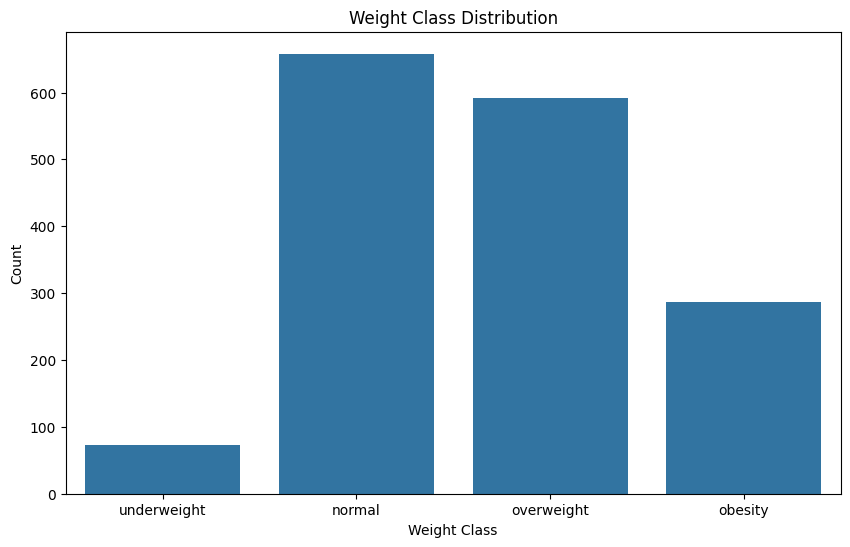

In [509]:
desired_order = ['underweight', 'normal', 'overweight', 'obesity']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weight_class', order = desired_order)
plt.title('Weight Class Distribution')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.show()


**As expected, the dataset resembles a normal distribution with majority people being in the normal and overweight weight classes.**

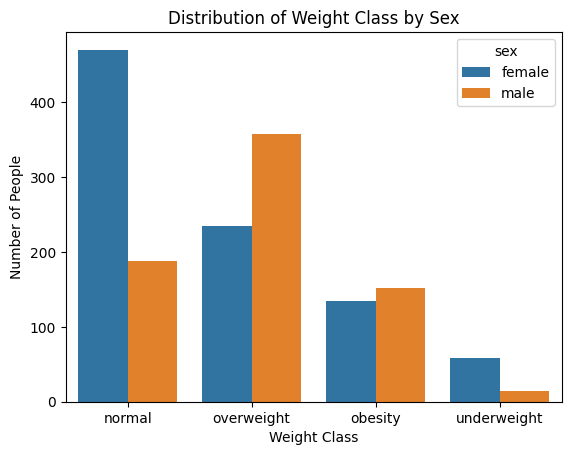

In [510]:
sns.countplot(x='weight_class', hue='sex', data=df)
plt.xlabel('Weight Class')
plt.ylabel('Number of People')
plt.title('Distribution of Weight Class by Sex')
plt.show()

**From the given data, it seems that men are more prone to being overweight/obese than women, where women have a higher tendency to be in their normal weight class, or even underweight. The reasons might be societal beauty standards for women.**

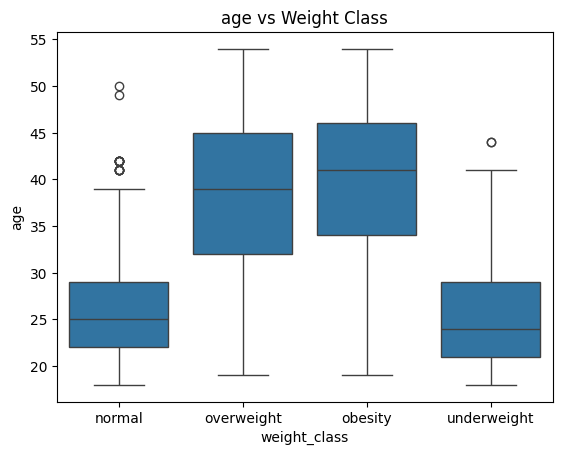

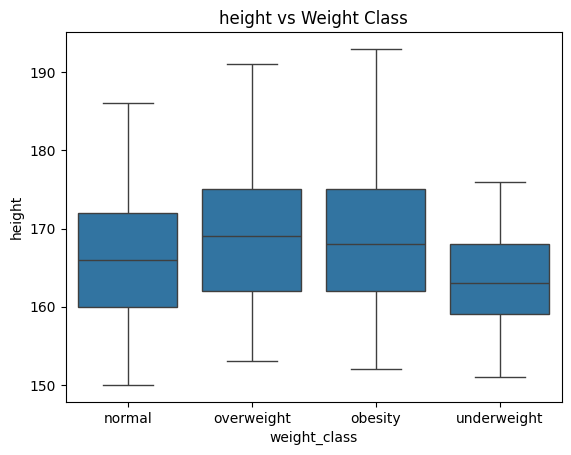

In [514]:
for col in ['age', 'height']:
    sns.boxplot(x='weight_class', y=col, data=df)
    plt.title(f'{col} vs Weight Class')
    plt.show()

**The above plots show that people are more prone to gaining weight (hence, the risk of being overweight and obesity) as they age.**

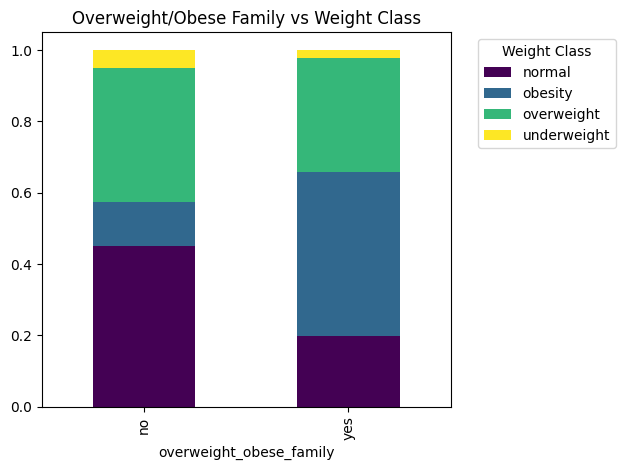

In [527]:
pd.crosstab(df['overweight_obese_family'], df['weight_class'], normalize='index').plot(
    kind='bar', stacked=True, colormap='viridis'
)
plt.title('Overweight/Obese Family vs Weight Class')
plt.legend(title='Weight Class', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout() 
plt.show()

**From the above plot, it is clear that having obesity in the family has an effect on the individual and they are more prone to obesity.**

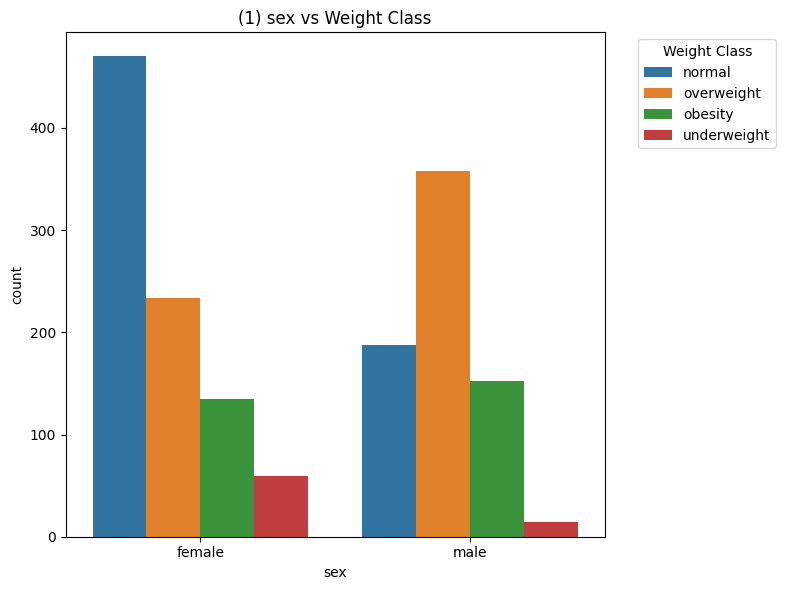

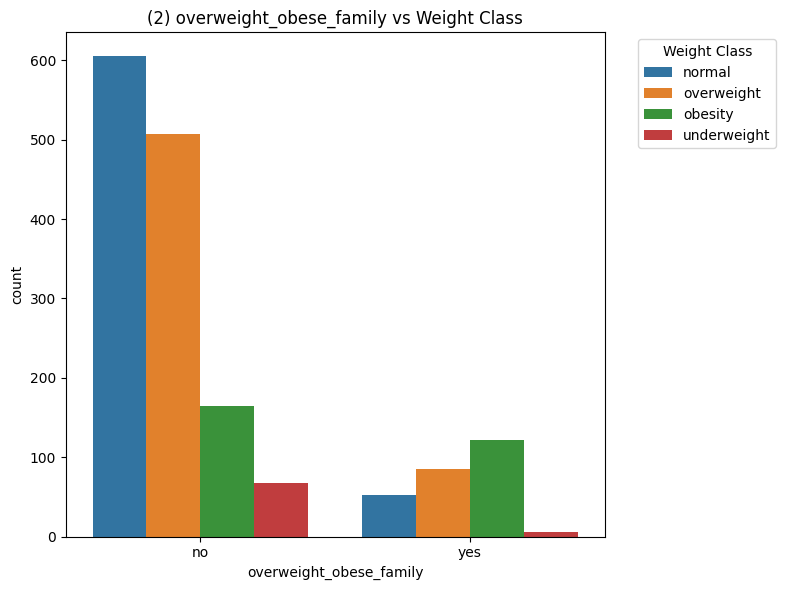

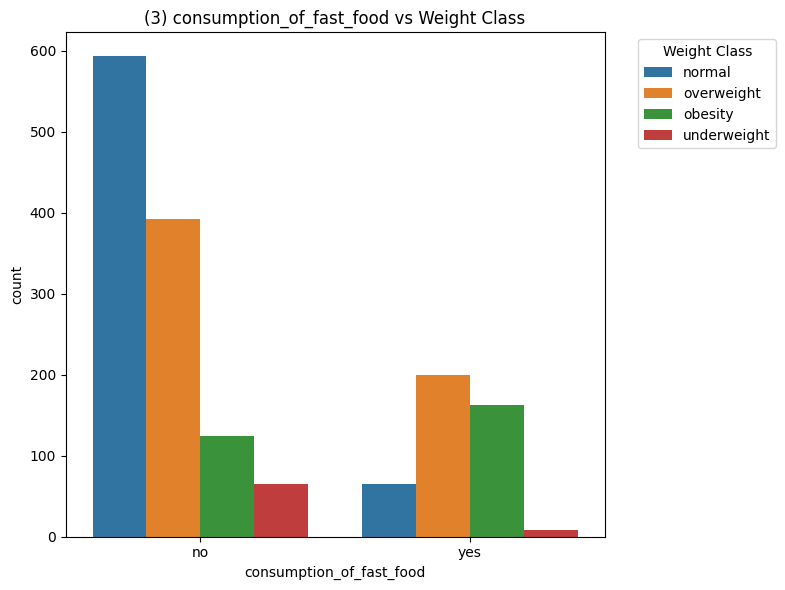

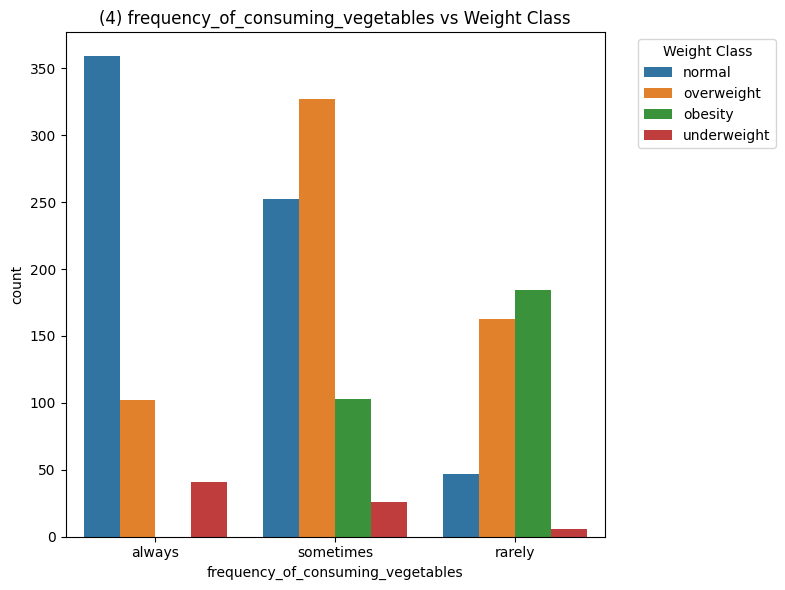

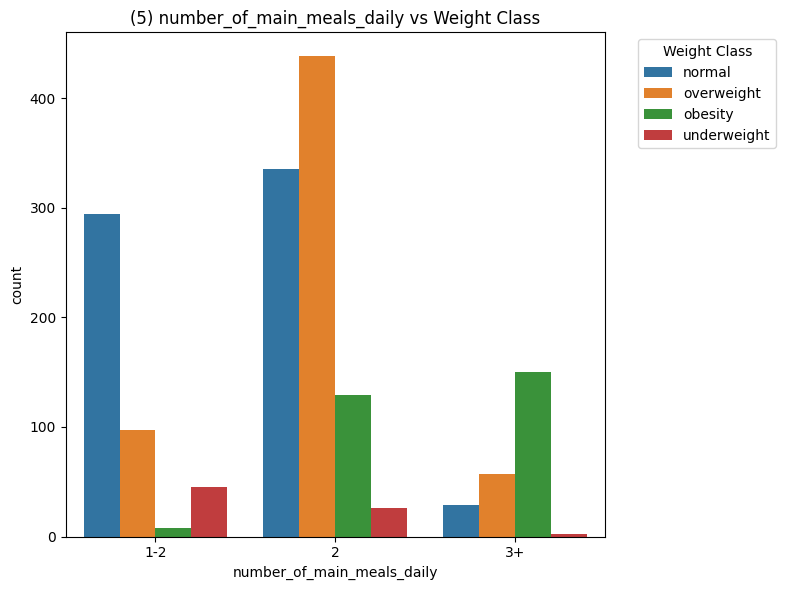

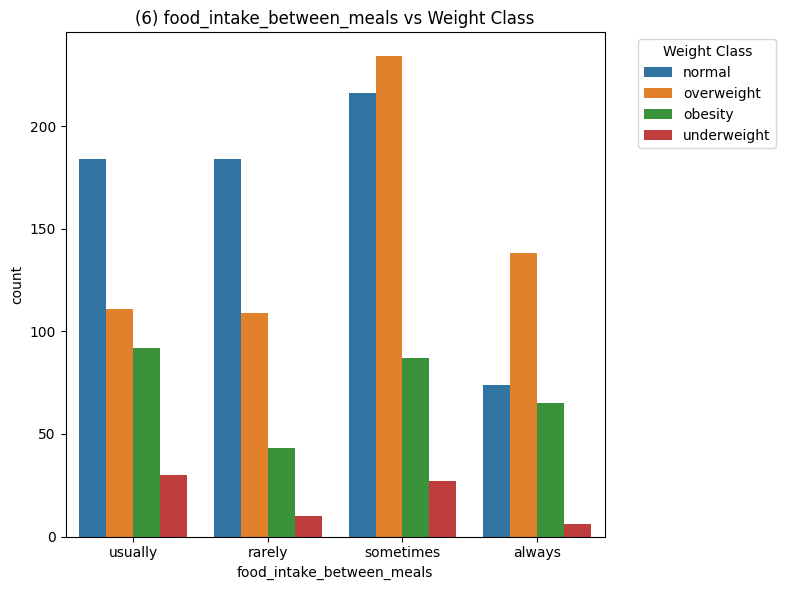

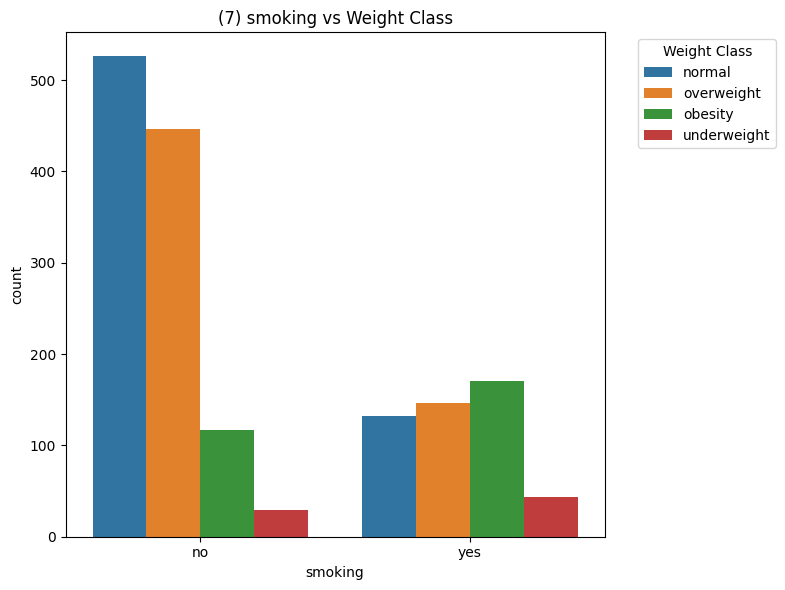

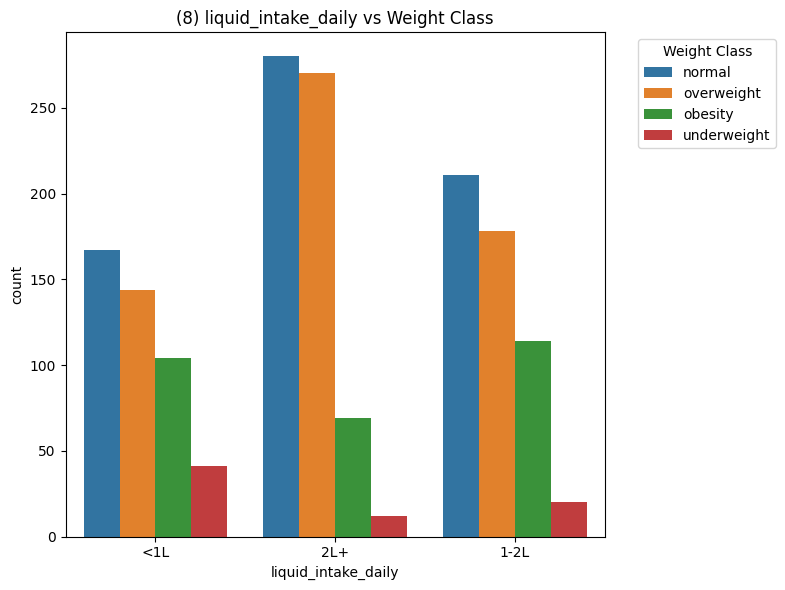

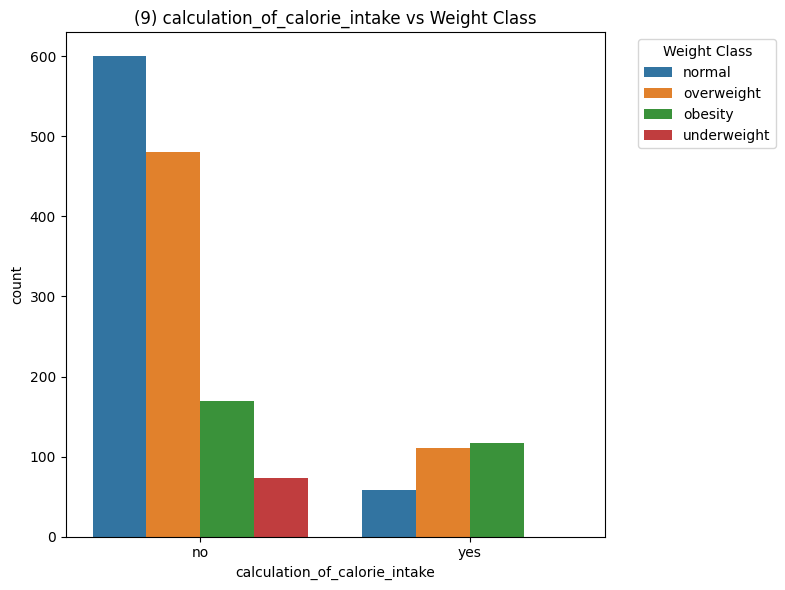

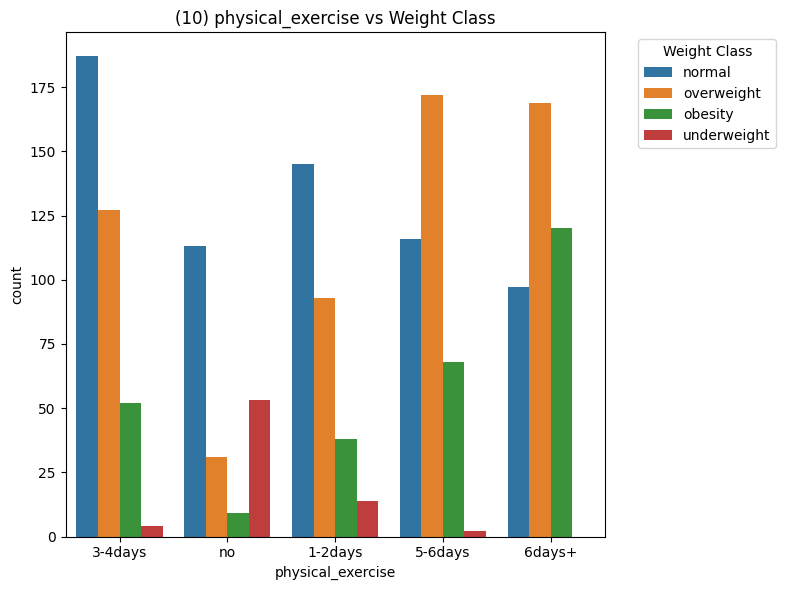

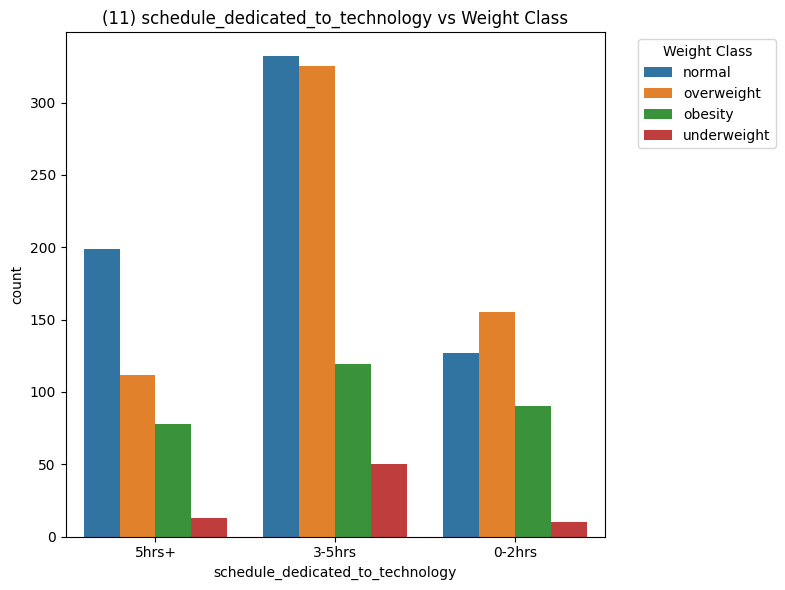

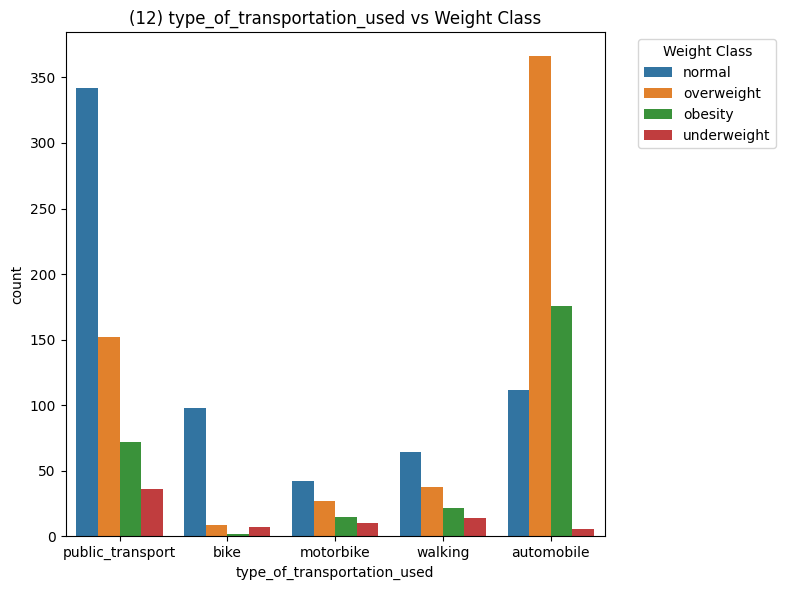

In [529]:
i = 1
for col in ['sex', 'overweight_obese_family', 'consumption_of_fast_food', 'frequency_of_consuming_vegetables', 'number_of_main_meals_daily', 'food_intake_between_meals', 'smoking', 'liquid_intake_daily', 'calculation_of_calorie_intake', 'physical_exercise', 'schedule_dedicated_to_technology', 'type_of_transportation_used']:
    plt.figure(figsize=(8, 6))  
    sns.countplot(x=col, hue='weight_class', data=df)
    plt.title(f'({i}) {col} vs Weight Class')
    plt.legend(title='Weight Class', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend to the side
    plt.tight_layout() 
    i += 1
    plt.show()

**As is expected, increased consumption of fast food (plot (3)), less consumption of fruits and vegetables (plot (4)), having more than 3+ meals per day (plot (5)), having frequent food intake in-between meals (plot (6)),   smoking (plot (7)), and using automobile as opposed to other modes of transportation/walking lead to increased chances of obesity.** 

**Plots (9) and (10) suggest that overweight/obese people are more likely to track their calorie intakes and exercise more frequently.**

In [482]:
df.groupby(['weight_class', 'physical_exercise']).size()

weight_class  physical_exercise
normal        1-2days              145
              3-4days              187
              5-6days              116
              6days+                97
              no                   113
obesity       1-2days               38
              3-4days               52
              5-6days               68
              6days+               120
              no                     9
overweight    1-2days               93
              3-4days              127
              5-6days              172
              6days+               169
              no                    31
underweight   1-2days               14
              3-4days                4
              5-6days                2
              no                    53
dtype: int64

# SPLITTING THE DATA INTO TRAIN-VAL-TEST DATASETS

In [483]:
#class
weight_class_val = {'underweight' : 1,
                    'normal' : 2,
                    'overweight' : 3,
                    'obesity' : 4}
df.weight_class = df.weight_class.map(weight_class_val)

In [484]:
df

,sex,age,height,overweight_obese_family,consumption_of_fast_food,frequency_of_consuming_vegetables,number_of_main_meals_daily,food_intake_between_meals,smoking,liquid_intake_daily,calculation_of_calorie_intake,physical_exercise,schedule_dedicated_to_technology,type_of_transportation_used,weight_class
0,female,18,155,no,no,always,1-2,usually,no,<1L,no,3-4days,5hrs+,public_transport,2
1,female,18,158,no,no,always,1-2,rarely,no,<1L,no,no,5hrs+,bike,2
2,female,18,159,no,no,sometimes,1-2,usually,no,2L+,no,1-2days,5hrs+,public_transport,2
3,female,18,162,no,no,sometimes,2,sometimes,no,1-2L,no,no,5hrs+,public_transport,2
4,female,18,165,no,yes,sometimes,1-2,usually,no,<1L,no,3-4days,5hrs+,motorbike,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,female,51,165,no,yes,rarely,3+,always,yes,2L+,yes,3-4days,0-2hrs,automobile,4
1606,female,51,163,no,yes,sometimes,2,always,no,1-2L,no,6days+,0-2hrs,automobile,4
1607,female,52,162,yes,no,rarely,3+,always,yes,2L+,yes,5-6days,0-2hrs,automobile,4
1608,female,53,168,no,yes,rarely,3+,always,yes,1-2L,no,1-2days,0-2hrs,automobile,4


In [485]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 3)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 3)

In [486]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [487]:
y_train = df_train['weight_class'].astype(int).values
y_val = df_val['weight_class'].astype(int).values
y_test = df_test['weight_class'].astype(int).values #.values converts pandas series to numpy array.


In [488]:
del df_train['weight_class']
del df_val['weight_class']
del df_test['weight_class']

In [489]:
train_dicts = df_train.to_dict(orient = 'records')
val_dicts = df_val.to_dict(orient= 'records')
test_dicts = df_test.to_dict(orient= 'records')

In [490]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [491]:
dv.get_feature_names_out()

array(['age', 'calculation_of_calorie_intake=no',
       'calculation_of_calorie_intake=yes', 'consumption_of_fast_food=no',
       'consumption_of_fast_food=yes', 'food_intake_between_meals=always',
       'food_intake_between_meals=rarely',
       'food_intake_between_meals=sometimes',
       'food_intake_between_meals=usually',
       'frequency_of_consuming_vegetables=always',
       'frequency_of_consuming_vegetables=rarely',
       'frequency_of_consuming_vegetables=sometimes', 'height',
       'liquid_intake_daily=1-2L', 'liquid_intake_daily=2L+',
       'liquid_intake_daily=<1L', 'number_of_main_meals_daily=1-2',
       'number_of_main_meals_daily=2', 'number_of_main_meals_daily=3+',
       'overweight_obese_family=no', 'overweight_obese_family=yes',
       'physical_exercise=1-2days', 'physical_exercise=3-4days',
       'physical_exercise=5-6days', 'physical_exercise=6days+',
       'physical_exercise=no', 'schedule_dedicated_to_technology=0-2hrs',
       'schedule_dedicated_t

In [492]:
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [493]:
# Define weight class labels
weight_class_labels = {1: 'Underweight', 2: 'Normal', 3: 'Overweight', 4: 'Obesity'}

## Models and Cross-validation

In [494]:
classifers = {
              'Random Forest': RandomForestClassifier(random_state=3),
              'SVM': SVC(random_state=3),
              'Decision Tree': DecisionTreeClassifier(random_state=3),
              'KNN': KNeighborsClassifier()
             }

### Training and evaluating the models


Random Forest Classifier:
Cross-validation accuracy: 0.799 (+/- 0.048)
Validation accuracy: 0.848
Test accuracy: 0.857
Precision: 0.863
Recall: 0.857
F1-score: 0.855

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.53      0.69        19
           2       0.86      0.90      0.88       146
           3       0.82      0.86      0.84       109
           4       0.93      0.83      0.88        48

    accuracy                           0.86       322
   macro avg       0.90      0.78      0.82       322
weighted avg       0.86      0.86      0.85       322



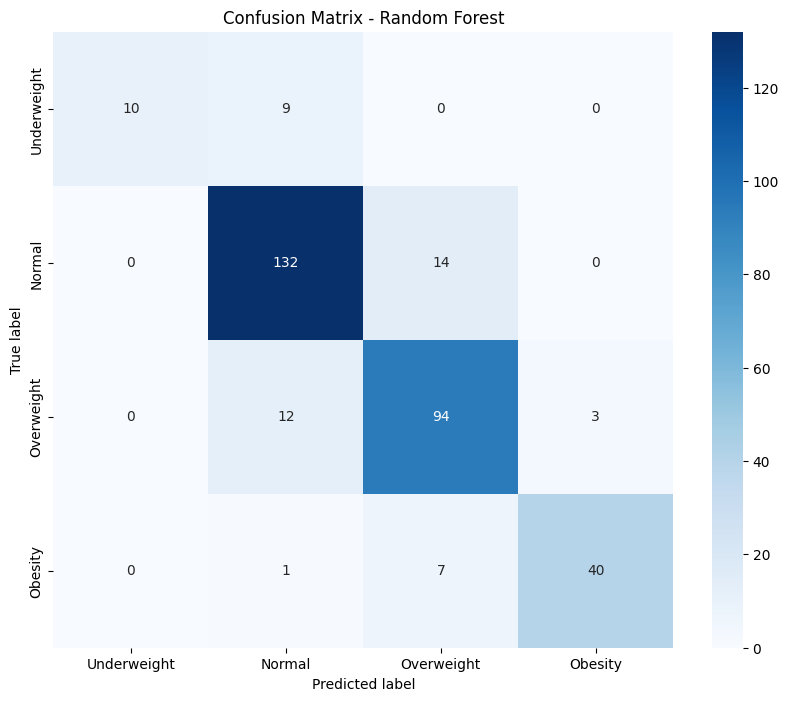


SVM Classifier:
Cross-validation accuracy: 0.626 (+/- 0.056)
Validation accuracy: 0.599
Test accuracy: 0.643
Precision: 0.510
Recall: 0.643
F1-score: 0.569

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.70      0.86      0.77       146
           3       0.57      0.74      0.65       109
           4       0.00      0.00      0.00        48

    accuracy                           0.64       322
   macro avg       0.32      0.40      0.35       322
weighted avg       0.51      0.64      0.57       322



/Users/anweshabasu/Documents/Venvs/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anweshabasu/Documents/Venvs/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anweshabasu/Documents/Venvs/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

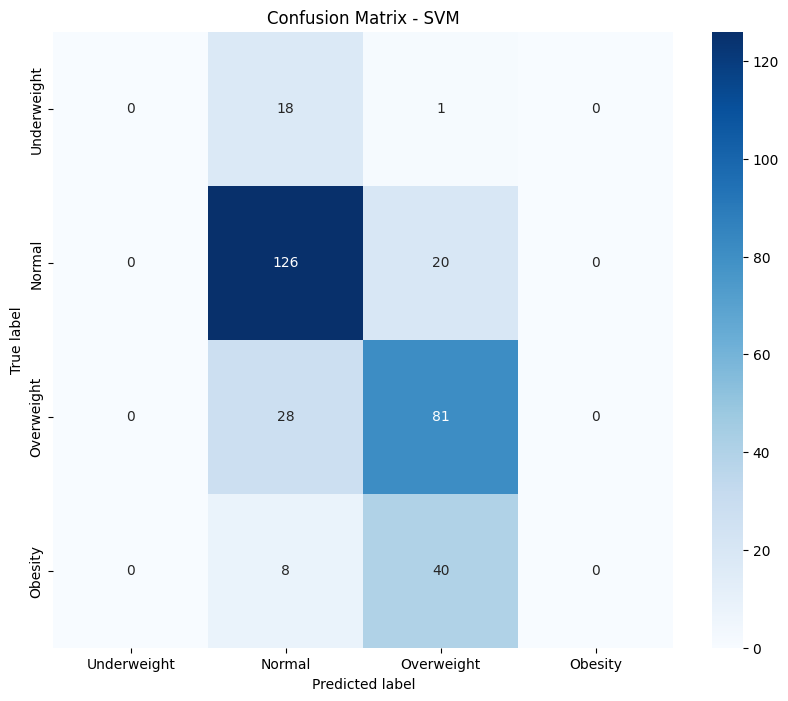


Decision Tree Classifier:
Cross-validation accuracy: 0.680 (+/- 0.043)
Validation accuracy: 0.730
Test accuracy: 0.776
Precision: 0.779
Recall: 0.776
F1-score: 0.777

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.63      0.65        19
           2       0.86      0.82      0.84       146
           3       0.74      0.77      0.76       109
           4       0.67      0.71      0.69        48

    accuracy                           0.78       322
   macro avg       0.73      0.73      0.73       322
weighted avg       0.78      0.78      0.78       322



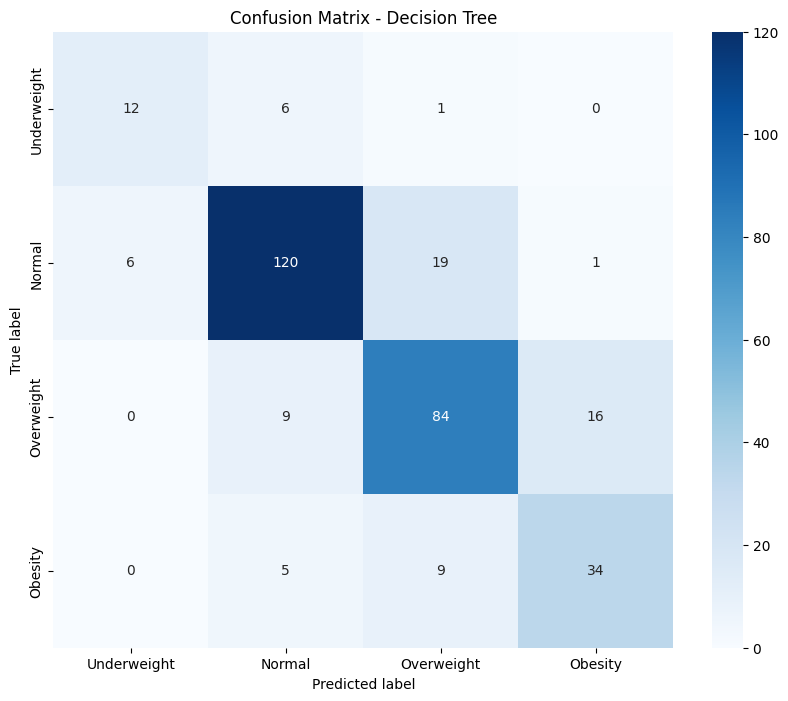


KNN Classifier:
Cross-validation accuracy: 0.648 (+/- 0.020)
Validation accuracy: 0.621
Test accuracy: 0.699
Precision: 0.685
Recall: 0.699
F1-score: 0.682

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.16      0.24        19
           2       0.74      0.85      0.79       146
           3       0.67      0.72      0.69       109
           4       0.62      0.42      0.50        48

    accuracy                           0.70       322
   macro avg       0.63      0.53      0.56       322
weighted avg       0.69      0.70      0.68       322



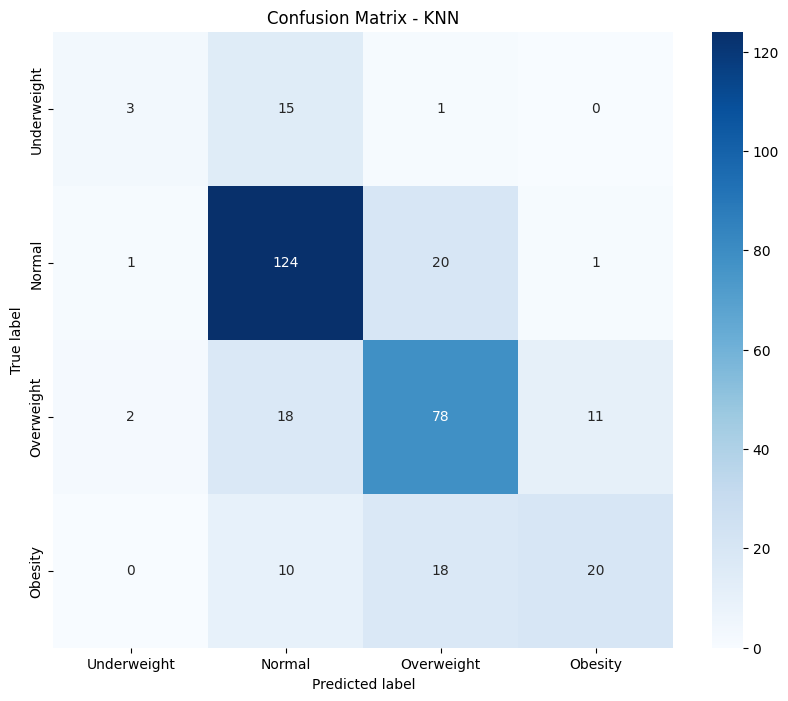

In [495]:
for name, clf in classifers.items():
    
    #5-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=3)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    
    #Fit the model
    
    clf.fit(X_train, y_train)
    
    #Predicting on validation set
    
    y_pred_val = clf.predict(X_val)
    
    #Predicting on test set
    
    y_pred_test = clf.predict(X_test)
    
    #Evaluating from the metrics
    
    val_accuracy = accuracy_score(y_val, y_pred_val)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    #Calculating the precision, recall, F1-score
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted', zero_division=0)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    
    # Print results
    print(f"\n{name} Classifier:")
    print(f"Cross-validation accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    print(f"Validation accuracy: {val_accuracy:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1_score:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))
    
     # Plot confusion matrix with labels
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[weight_class_labels[i+1] for i in range(4)],
                yticklabels=[weight_class_labels[i+1] for i in range(4)])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

In [525]:
#Saving a random data point for future testing
trial = df_train.iloc[943]
trial

sex                                     female
age                                         32
height                                     158
overweight_obese_family                     no
consumption_of_fast_food                    no
frequency_of_consuming_vegetables    sometimes
number_of_main_meals_daily                   2
food_intake_between_meals              usually
smoking                                     no
liquid_intake_daily                       1-2L
calculation_of_calorie_intake               no
physical_exercise                      1-2days
schedule_dedicated_to_technology        3-5hrs
type_of_transportation_used            walking
Name: 943, dtype: object

**Of all the models used, Random Forest Classifiers give the best results, with a test accuracy of 85.7% and F1 score of 0.855. Hence, this model has been used for deployment.**